The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

**It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.**

Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

[Link of Project and Data](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Dataset

In [3]:
credit_cards = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/11 - Kaggle Practicing/1 - Credit Card Fraud Detection/creditcard.csv')
credit_cards

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
credit_cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
credit_cards['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
credit_cards.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Data Plot

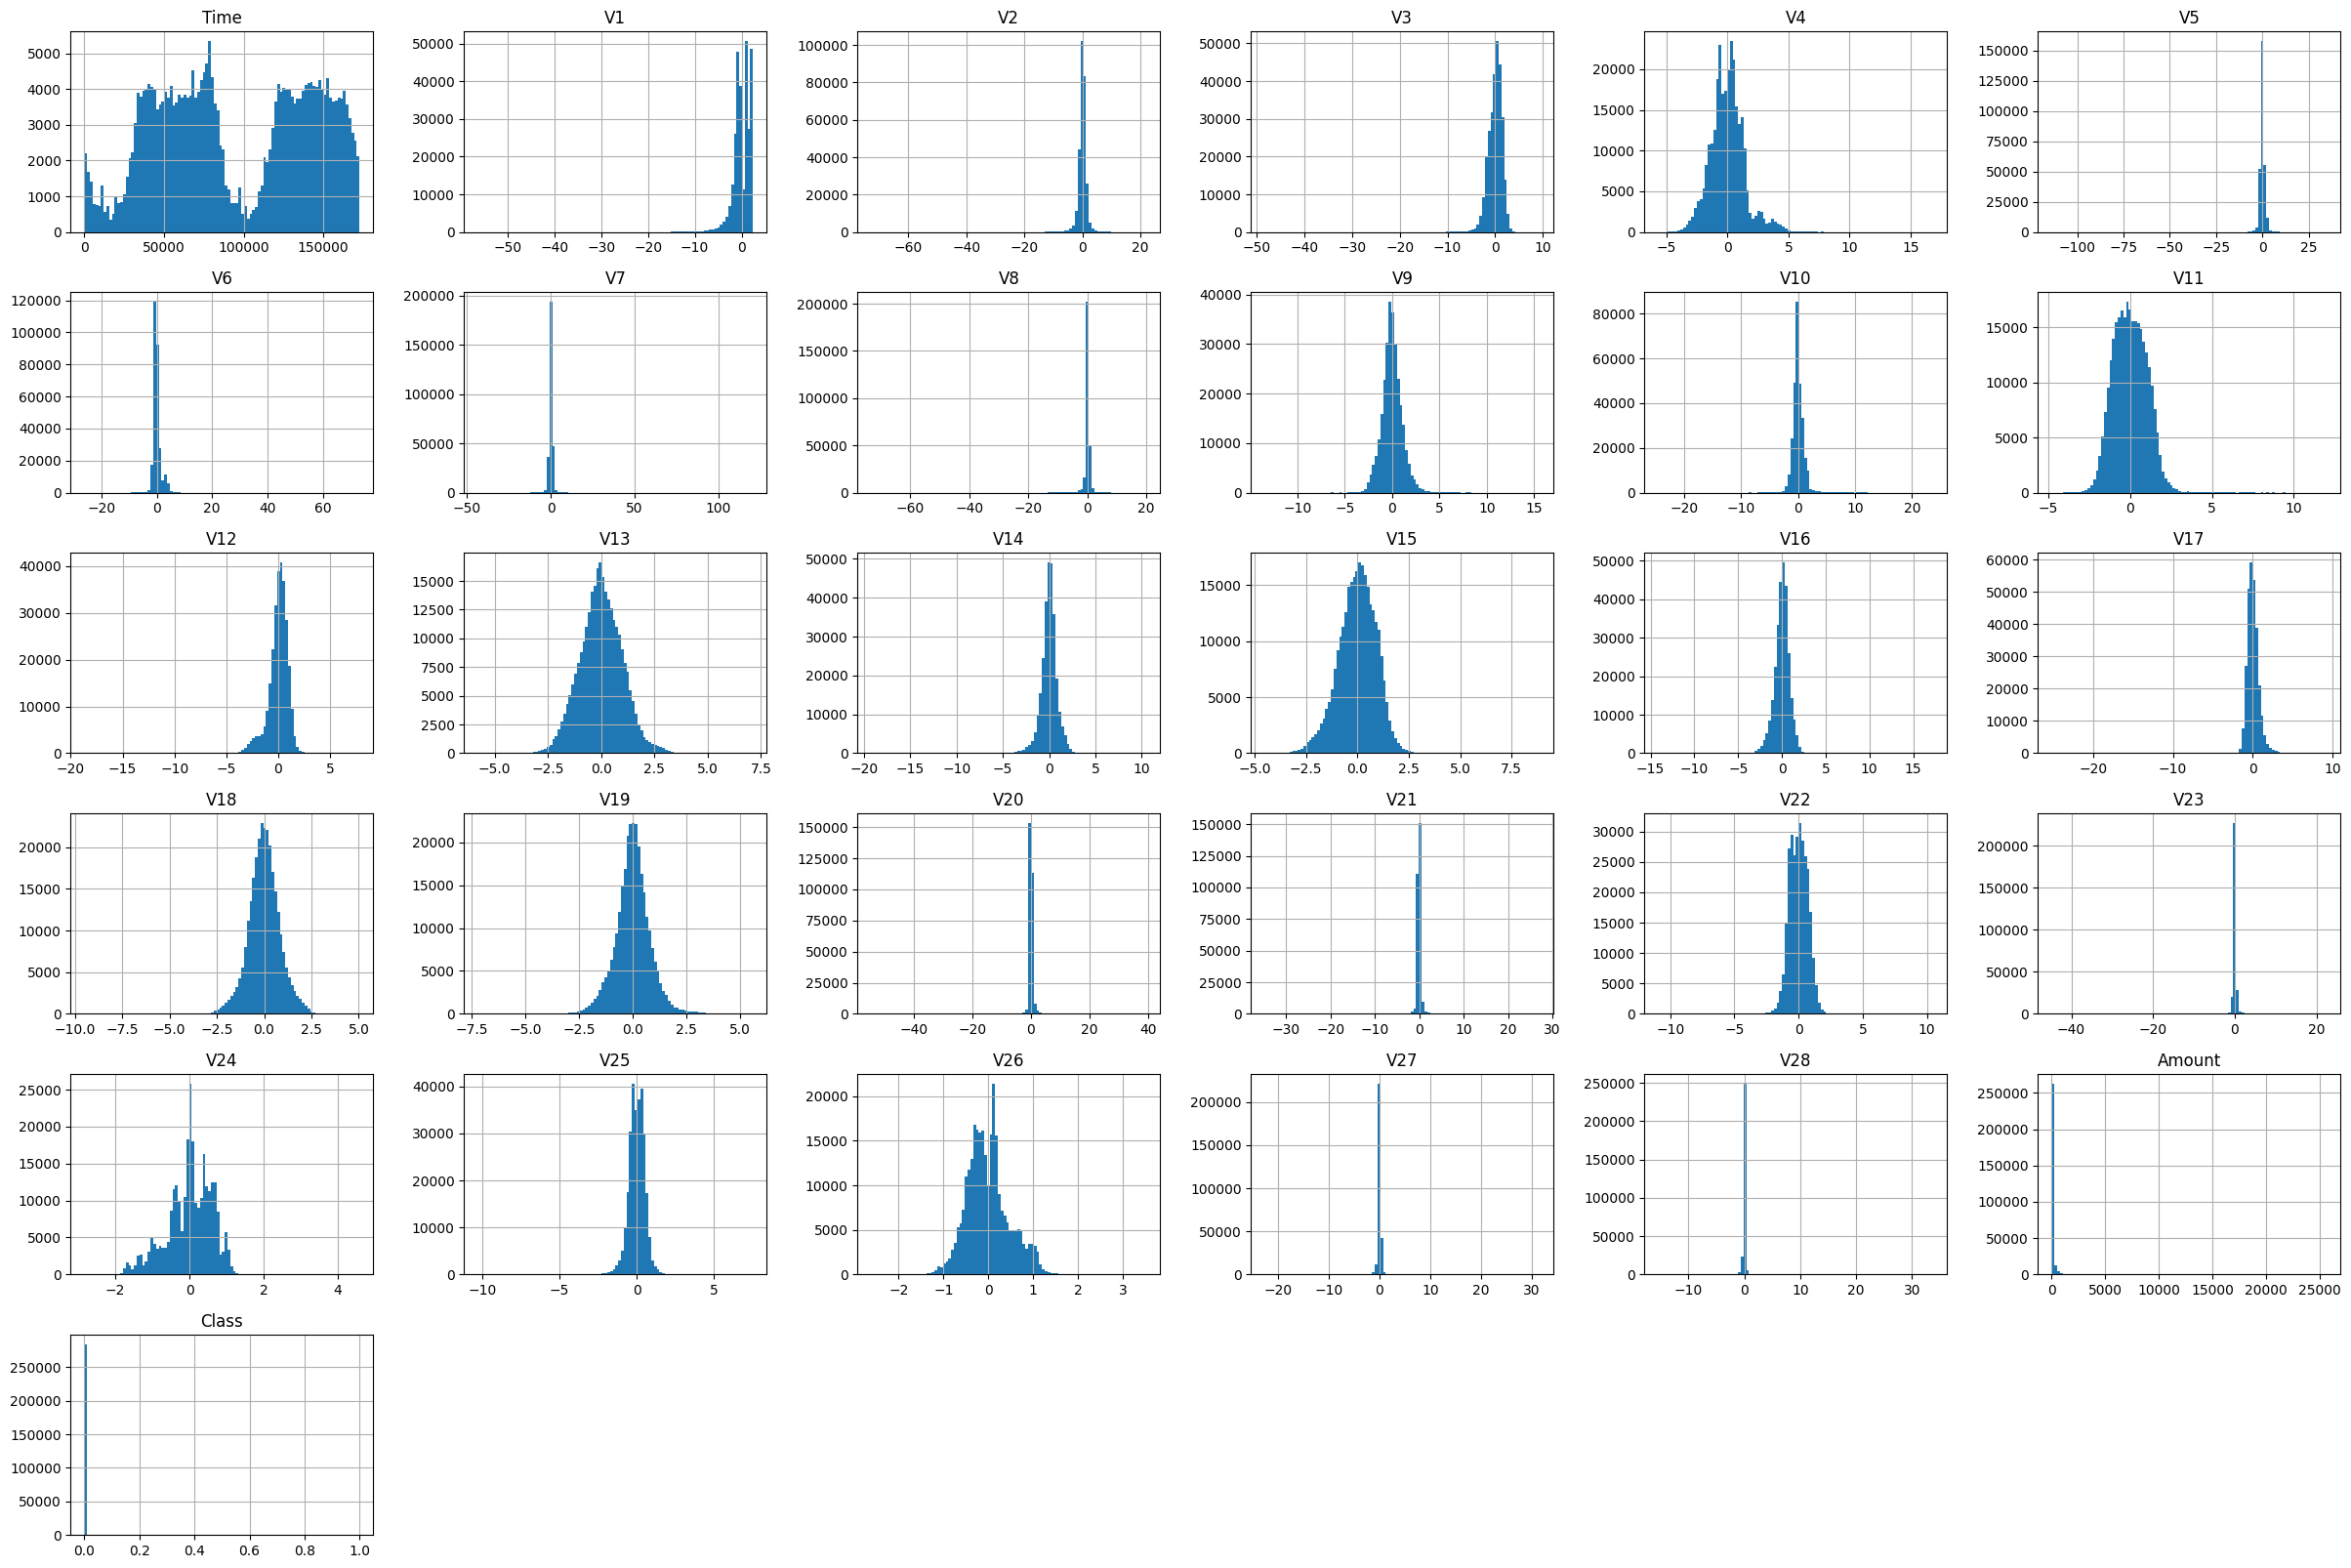

In [7]:
credit_cards.hist(bins=100,figsize=(30,20))
plt.show()

Text(0, 0.5, 'Second')

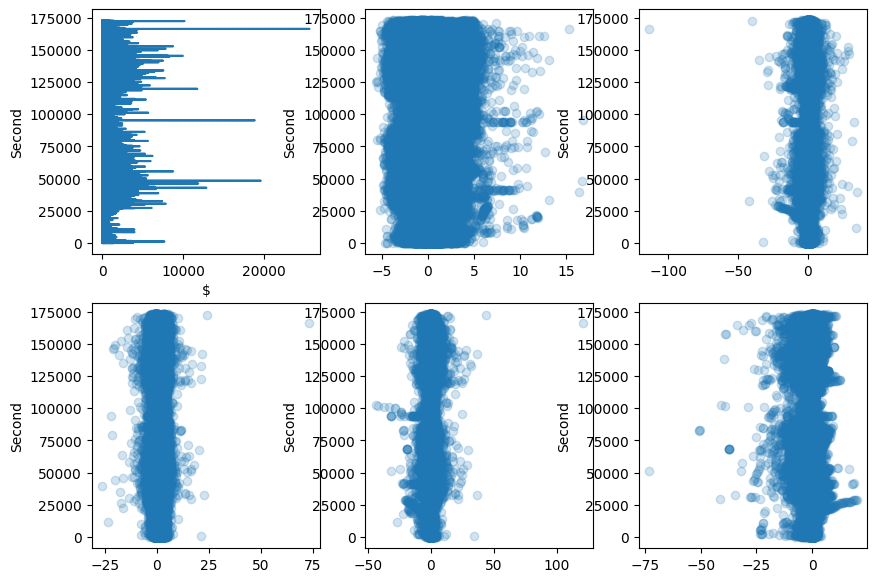

In [8]:
plt.figure(figsize=(10,7))

plt.subplot(231)
plt.plot(credit_cards['Amount'],credit_cards['Time'])
plt.xlabel('$')
plt.ylabel('Second')

plt.subplot(232)
plt.scatter(credit_cards['V4'],credit_cards['Time'],alpha=0.2)
plt.ylabel('Second')

plt.subplot(233)
plt.scatter(credit_cards['V5'],credit_cards['Time'],alpha=0.2)
plt.ylabel('Second')

plt.subplot(234)
plt.scatter(credit_cards['V6'],credit_cards['Time'],alpha=0.2)
plt.ylabel('Second')

plt.subplot(235)
plt.scatter(credit_cards['V7'],credit_cards['Time'],alpha=0.2)
plt.ylabel('Second')

plt.subplot(236)
plt.scatter(credit_cards['V8'],credit_cards['Time'],alpha=0.2)
plt.ylabel('Second')

## Data Pre-Processing

### Normalize Data

In [9]:
from sklearn.preprocessing import Normalizer


In [10]:
scaler = Normalizer().fit(np.array(credit_cards))
credit_cards_normal = scaler.transform(np.array(credit_cards))

In [11]:
pd.DataFrame(credit_cards_normal)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.000000,-0.009085,-4.862740e-04,0.016946,0.009208,-2.260428e-03,0.003089,1.600834e-03,0.000659,0.002431,...,-0.000122,1.856321e-03,-7.381111e-04,4.471676e-04,0.000859,-1.263536e-03,8.923457e-04,-1.406621e-04,0.999658,0.0
1,0.000000,0.314200,7.016324e-02,0.043888,0.118143,1.582199e-02,-0.021712,-2.077422e-02,0.022435,-0.067336,...,-0.059519,-1.683681e-01,2.670177e-02,-8.959108e-02,0.044070,3.318859e-02,-2.368144e-03,3.881618e-03,0.709144,0.0
2,0.002641,-0.003587,-3.538757e-03,0.004682,0.001003,-1.328716e-03,0.004754,2.089886e-03,0.000654,-0.004000,...,0.000655,2.037652e-03,2.401341e-03,-1.820075e-03,-0.000865,-3.672903e-04,-1.461614e-04,-1.577772e-04,0.999868,0.0
3,0.008092,-0.007819,-1.498855e-03,0.014509,-0.006986,-8.341979e-05,0.010092,1.922739e-03,0.003054,-0.011224,...,-0.000876,4.267412e-05,-1.540080e-03,-9.512794e-03,0.005239,-1.795856e-03,5.075554e-04,4.973172e-04,0.999366,0.0
4,0.028527,-0.016520,1.251955e-02,0.022090,0.005749,-5.807982e-03,0.001368,8.457380e-03,-0.003859,0.011664,...,-0.000135,1.138620e-02,-1.960626e-03,2.014954e-03,-0.002938,7.164419e-03,3.129718e-03,3.068826e-03,0.998299,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.000000,-0.000069,5.829051e-05,-0.000057,-0.000012,-3.104692e-05,-0.000015,-2.846420e-05,0.000042,0.000011,...,0.000001,6.474120e-07,5.871308e-06,-2.947857e-06,0.000008,1.447075e-06,5.461387e-06,4.767348e-06,0.000004,0.0
284803,1.000000,-0.000004,-3.187768e-07,0.000012,-0.000004,5.024854e-06,0.000006,1.408074e-07,0.000002,0.000003,...,0.000001,5.349844e-06,7.212949e-08,-5.881378e-06,-0.000004,-2.287528e-06,3.962825e-07,-3.097883e-07,0.000143,0.0
284804,1.000000,0.000011,-1.743488e-06,-0.000019,-0.000003,1.522394e-05,0.000018,-1.717865e-06,0.000004,0.000003,...,0.000001,3.346465e-06,-2.170339e-07,3.704735e-06,0.000002,-5.056519e-07,2.578172e-08,-1.537192e-07,0.000393,0.0
284805,1.000000,-0.000001,3.070135e-06,0.000004,0.000004,-2.187427e-06,0.000004,-3.971225e-06,0.000004,0.000002,...,0.000002,4.630233e-06,-9.450769e-07,7.130428e-07,-0.000003,3.163810e-06,6.297934e-07,6.049773e-07,0.000058,0.0


### Resampling Data (Over Sampling)

The Percentage of Frauds = 0.173%


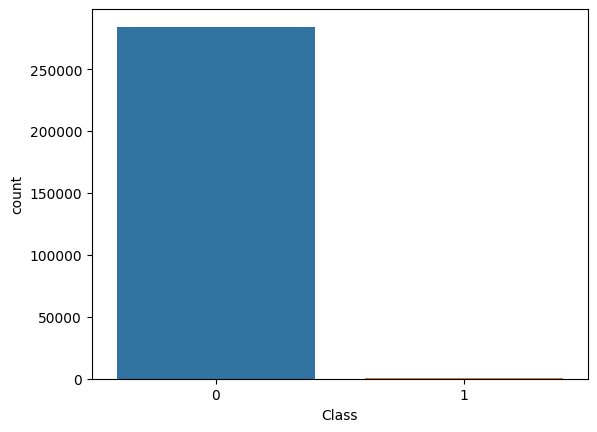

In [12]:
sns.countplot(x='Class', data=credit_cards)

lenght0 = len(credit_cards[credit_cards['Class']==0])
lenght1 = len(credit_cards[credit_cards['Class']==1])
print(f'The Percentage of Frauds = {lenght1/lenght0*100:.3f}%')

In [13]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Separate features and target variable
X = credit_cards.drop('Class', axis=1)
y = credit_cards['Class']

# Perform oversampling with RandomOverSampler
oversampler = RandomOverSampler()
X_over, y_over = oversampler.fit_resample(X, y)

# Perform undersampling with RandomUnderSampler
undersampler = RandomUnderSampler()
X_under, y_under = undersampler.fit_resample(X, y)

# Check the class distribution after sampling
print("Original class distribution:")
print(y.value_counts())

print("\nClass distribution after oversampling:")
print(y_over.value_counts())

print("\nClass distribution after undersampling:")
print(y_under.value_counts())


Original class distribution:
0    284315
1       492
Name: Class, dtype: int64

Class distribution after oversampling:
0    284315
1    284315
Name: Class, dtype: int64

Class distribution after undersampling:
0    492
1    492
Name: Class, dtype: int64


In [14]:
credit_cards_sampled = pd.concat([X_over, y_over],axis=1)
credit_cards_sampled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,39729.0,-0.964567,-1.643541,-0.187727,1.158253,-2.458336,0.852222,2.785163,-0.303609,0.940006,...,0.447180,0.536204,1.634061,0.203839,0.218749,-0.221886,-0.308555,-0.164500,776.83,1
568626,109298.0,-1.000611,3.346850,-5.534491,6.835802,-0.299803,0.095951,-2.440419,1.286301,-2.766438,...,0.439757,-0.694099,0.299660,-0.657601,0.101648,0.430457,0.824685,0.326952,186.13,1
568627,158638.0,-5.976119,-7.196980,-5.388316,5.104799,4.676533,-5.566870,-4.291180,0.876531,-1.075478,...,1.459369,-0.136262,0.848177,-0.269916,-1.095060,-0.710905,0.565846,-1.034107,296.00,1
568628,35926.0,-3.896583,4.518355,-4.454027,5.547453,-4.121459,-1.163407,-6.805053,2.928356,-4.917130,...,1.691042,0.920021,-0.151104,0.011007,0.080303,0.412191,0.635789,0.501050,4.56,1


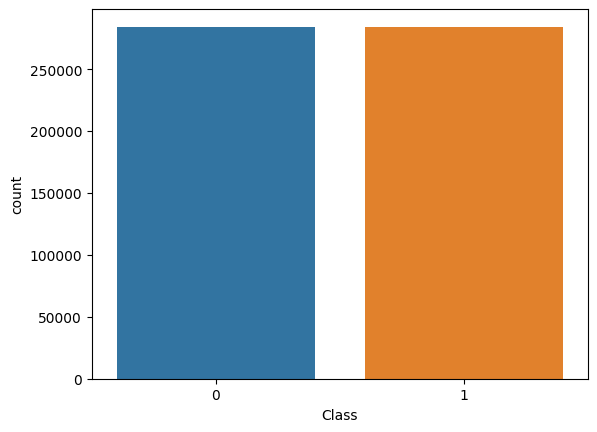

In [15]:
sns.countplot(x='Class', data=credit_cards_sampled)

lenght0 = len(credit_cards_sampled[credit_cards_sampled['Class']==0])
lenght1 = len(credit_cards_sampled[credit_cards_sampled['Class']==1])


In [16]:
np.array(credit_cards_sampled)

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
        -2.10530535e-02,  1.49620000e+02,  0.00000000e+00],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
         1.47241692e-02,  2.69000000e+00,  0.00000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.97518406e-02,  3.78660000e+02,  0.00000000e+00],
       ...,
       [ 1.58638000e+05, -5.97611932e+00, -7.19697963e+00, ...,
        -1.03410719e+00,  2.96000000e+02,  1.00000000e+00],
       [ 3.59260000e+04, -3.89658259e+00,  4.51835470e+00, ...,
         5.01049550e-01,  4.56000000e+00,  1.00000000e+00],
       [ 1.60895000e+05, -8.48290217e-01,  2.71988212e+00, ...,
        -1.71396981e-01,  1.27140000e+02,  1.00000000e+00]])

## Train Test Split

## Logistic Regression

### ROC and AUC Curves

### K-Fold Cross Validation for Classification

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x = credit_cards_sampled.drop('Class',axis = 1)
y = credit_cards_sampled['Class']

In [19]:
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size = 0.3)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
LR = LogisticRegression(max_iter=1000)
LR.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:
y_pred = LR.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,y_pred)
cf

array([[81671,  3672],
       [10292, 74954]])

In [24]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     85343
           1       0.95      0.88      0.91     85246

    accuracy                           0.92    170589
   macro avg       0.92      0.92      0.92    170589
weighted avg       0.92      0.92      0.92    170589



Because the Data is Imbalanced, The confusion matrix is not proper solution so we use AUc and ROC Curve

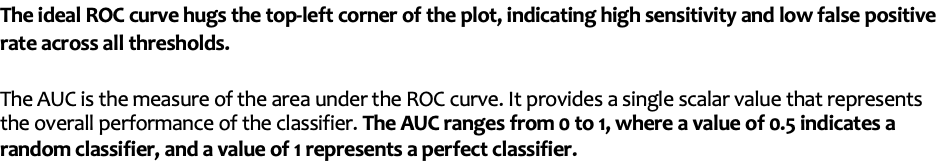

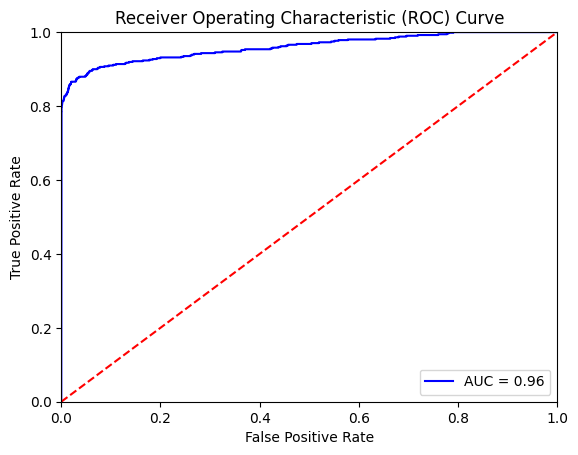

In [25]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_prob = LR.predict_proba(x_test)[:, 1]


# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the AUC score
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


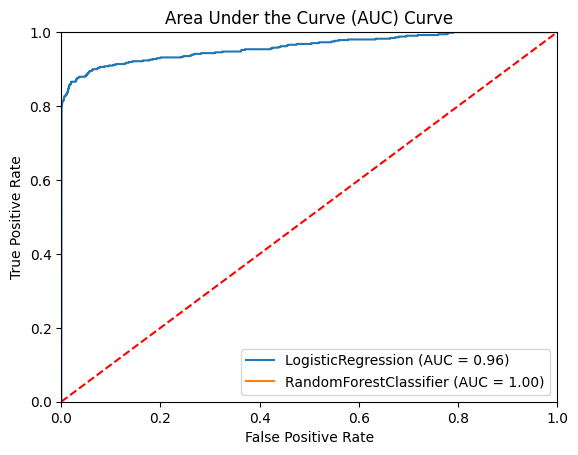

LogisticRegression: AUC = 0.96
RandomForestClassifier: AUC = 1.00


In [26]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Train different classifiers
classifiers = [
    LogisticRegression(),
    RandomForestClassifier()
]

# Dictionary to store AUC scores
auc_scores = {}

# Plot ROC curves and calculate AUC scores for each classifier
for classifier in classifiers:
    # Train the classifier
    classifier.fit(x_train, y_train)

    # Get predicted probabilities for the positive class
    y_prob = classifier.predict_proba(x_test)[:, 1]

    # Compute the false positive rate, true positive rate, and thresholds
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    # Compute the AUC score
    auc_score = auc(fpr, tpr)

    # Store the AUC score
    auc_scores[type(classifier).__name__] = auc_score

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{type(classifier).__name__} (AUC = {auc_score:.2f})')

# Plot the AUC curve
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under the Curve (AUC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC scores
for classifier_name, auc_score in auc_scores.items():
    print(f'{classifier_name}: AUC = {auc_score:.2f}')

In [27]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LR,x,y,scoring="accuracy",cv=5)

# Print the accuracy scores for each fold
for i, score in enumerate(scores):
    print(f'Fold {i+1}: {score}')

# Calculate and print the average accuracy across all folds
average_accuracy = np.mean(scores)
print(f'Average Accuracy: {average_accuracy}')

Fold 1: 0.8839491409176442
Fold 2: 0.9133443539735856
Fold 3: 0.9470393753407312
Fold 4: 0.9315020311977912
Fold 5: 0.9337090902695954
Average Accuracy: 0.9219087983398696


### Plot the classes in Data Frame

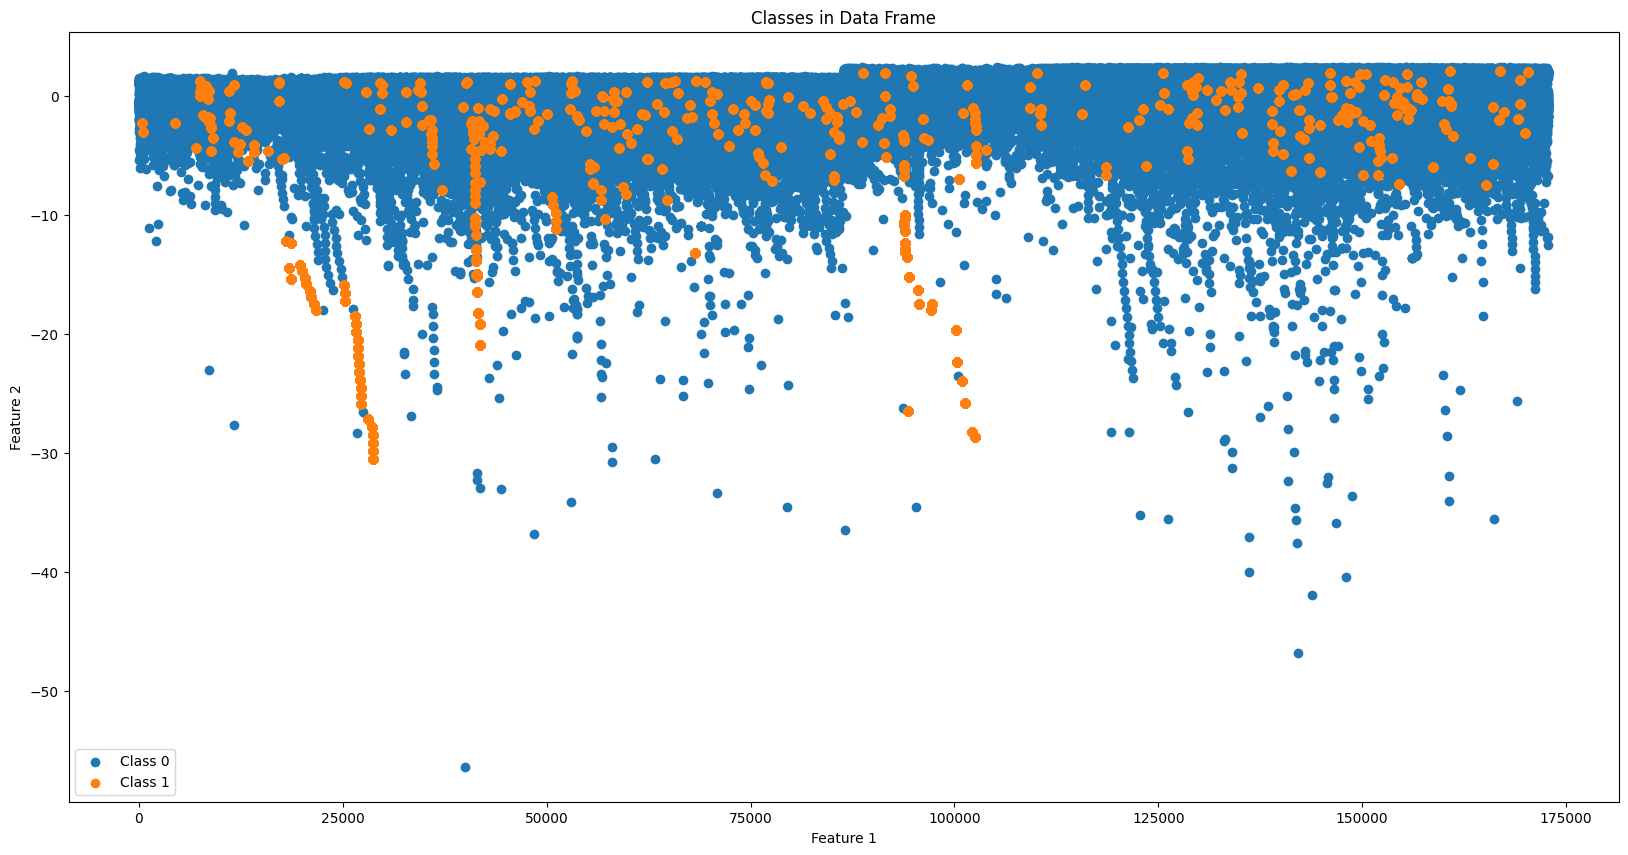

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification


plt.figure(figsize=(20,10))
# Assuming "credit_cards" DataFrame contains features and target variable
features = credit_cards_sampled.drop('Class',axis = 1)
target = credit_cards_sampled['Class']

# Plot the classes
plt.scatter(features[target == 0].iloc[:, 0], features[target == 0].iloc[:, 1], label='Class 0')
plt.scatter(features[target == 1].iloc[:, 0], features[target == 1].iloc[:, 1], label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classes in Data Frame')
plt.legend()
plt.show()

### Train a logistic regression model and plot the Decision Boundary

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


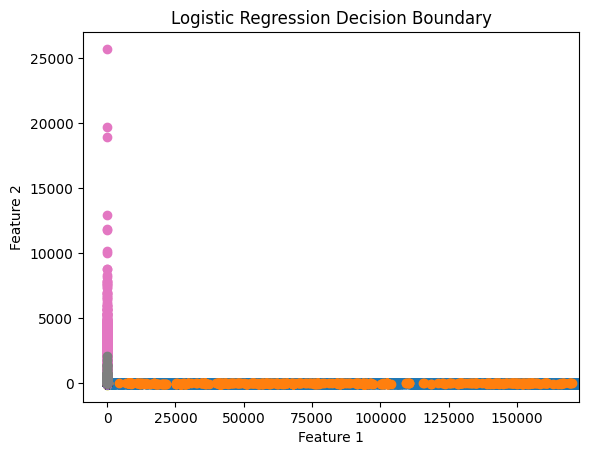

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Assuming "credit_cards" DataFrame contains features and target variable
features = credit_cards.iloc[:, :-1]  # Extract all columns except the last one
target = credit_cards.iloc[:, -1]  # Extract the last column as the target variable

# Train logistic regression model
#model = LogisticRegression()
LR.fit(features, target)

# Plot the decision boundary
# Create a mesh grid of feature values
mins = features.min(axis=0) - 1
maxs = features.max(axis=0) + 1
steps = 1
xx, yy = np.meshgrid(np.arange(mins[0], maxs[0], steps), np.arange(mins[1], maxs[1], steps))
mesh_grid = np.column_stack([xx.ravel(), yy.ravel()] + [np.zeros(xx.ravel().shape) for _ in range(features.shape[1] - 2)])

# Predict on the mesh grid
Z = LR.predict(mesh_grid)
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.8)
for i in range(features.shape[1] - 1):
    plt.scatter(features[target == 0].iloc[:, i], features[target == 0].iloc[:, i + 1], label='Class 0')
    plt.scatter(features[target == 1].iloc[:, i], features[target == 1].iloc[:, i + 1], label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
#plt.legend()
plt.show()


## Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

RandomForestClassifier()

In [32]:
y_pred_rfc = RFC.predict(x_test)

In [33]:
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85343
           1       1.00      1.00      1.00     85246

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



### ROC and AUC for Random Forest Classifier

AUC for Random Forest Classifier: 1.0


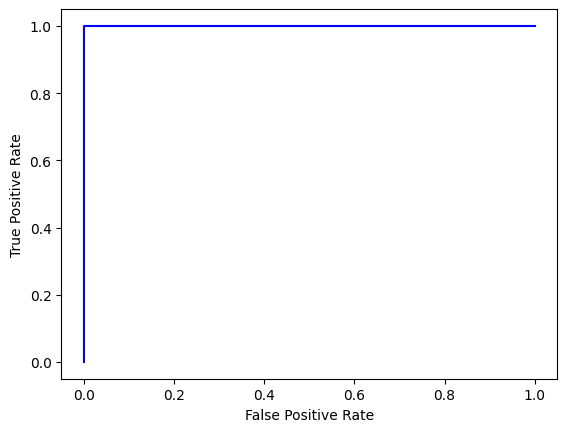

In [34]:
y_prob_rfc = RFC.predict_proba(x_test)[:,1]

fpr_rfc , tpr_rfc , threshold_rfc = roc_curve(y_test, y_prob_rfc)

auc_score_rfc = auc(fpr_rfc, tpr_rfc)

plt.plot(fpr_rfc, tpr_rfc, '-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print(f'AUC for Random Forest Classifier: {auc_score_rfc}')

### K-Fold Cross Validation for Random Forest Classifier

In [35]:
scores_rfc = cross_val_score(RFC, x, y,scoring='accuracy', cv=5)

print(scores_rfc)

[0.99926138 0.99999121 0.99985052 0.99998241 0.68744175]


# One more time classification with ANOVA Score (Feature selection)

 **The issue at hand is that our Dataframe contains 28 features, but not all of them are necessary for our classification tasks. How can we determine which features are more significant and should be utilized?**

**Answer: with ANOVA Test**

ANOVA (Analysis of Variance) is not specifically a test used in classification. ANOVA is a statistical technique used to determine if there are any statistically significant differences between the means of two or more groups. It is typically applied in the context of hypothesis testing to compare group means and assess the impact of categorical variables on a continuous outcome variable.

In classification, ANOVA may be used as a preliminary analysis to assess the relationship between categorical predictor variables and a continuous target variable. It can help determine if there are significant differences in the means of the target variable across different categories or groups. This information can be useful in feature selection or identifying important variables for classification models.

However, it's important to note that ANOVA itself does not perform classification. It is a technique for analyzing the differences between groups, and its application in classification is usually in the context of feature selection or assessing the importance of variables.

When it comes to classification tasks, there are specific algorithms and techniques designed for building models and predicting class labels based on input features, such as logistic regression, decision trees, random forests, support vector machines, and neural networks. These methods are more commonly used for classification tasks and can provide more comprehensive modeling and prediction capabilities.

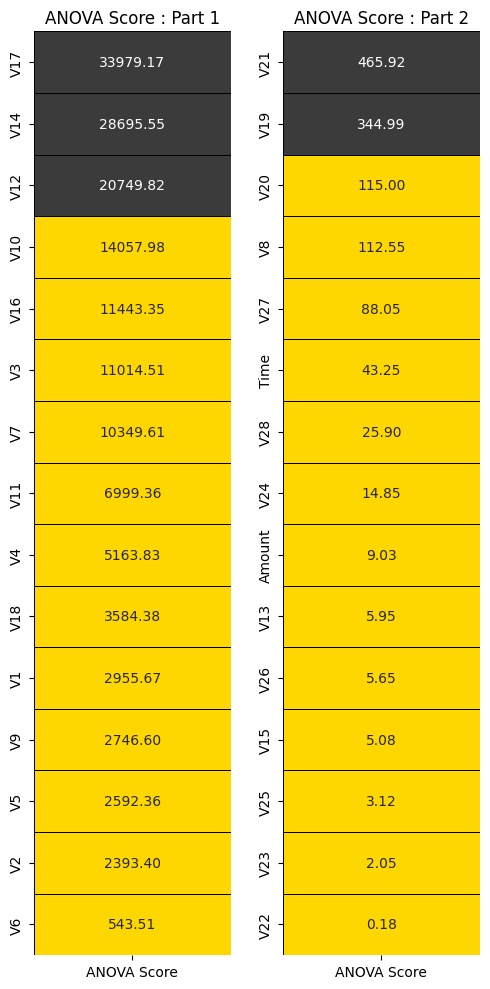

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

colors = ['#FFD700','#3B3B3C']


features = credit_cards.loc[:,:'Amount']
target = credit_cards.loc[:,'Class']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])
featureScores = featureScores.sort_values(ascending = False,by = 'ANOVA Score')

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(featureScores.iloc[:15,:],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 1')

plt.subplot(1,2,2)
sns.heatmap(featureScores.iloc[15:30],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 2')

fig.tight_layout(w_pad = 2)

In [37]:
credit_cards_anova = credit_cards.copy(deep = True)
credit_cards_anova.drop(columns = list(featureScores.index[20:]), inplace= True)
credit_cards_anova

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V14,V16,V17,V18,V19,V20,V21,V27,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.133558,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.008983,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,-0.055353,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.062723,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.219422,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,2.711941,4.626942,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.943651,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.915802,-0.675143,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.068472,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.063119,-0.510602,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.004455,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,-0.962886,0.449624,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.108821,0


In [38]:
x_anova = credit_cards_anova.drop('Class', axis =1)
y_anova = credit_cards_anova['Class']

In [39]:
x_train_anova , y_train_anova, x_test_anova, y_test_anova = train_test_split(x_anova, y_anova, test_size =0.3)

In [40]:
#RFC.fit(x_train_anova,y_train_anova)